In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from scipy.stats import norm

df = pd.read_csv("../datasets/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [144]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [145]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

1. Crear una tabla directa de datos agrupados, caculo de la nota final de estudiantes:   

* A (90-100%): Excelente. Una calificación de A+ puede corresponder a un rango de 97-100% y un GPA de 4.0.
* B (80-89%): Muy bien. Dentro de este rango, una B+ podría ser de 87-89%.
* C (70-79%): Bien/Aceptable.
* D (60-69%): Suficiente o deficiente.
* F (menos de 60%): Suspenso o trabajo muy deficiente. 


In [146]:
# Nota final

students_note = df[["math score", "reading score", "writing score"]].to_numpy()
note_finale = np.sum(students_note, axis=1) / students_note.shape[1]
df["note finale"] = pd.Series(note_finale)


# Limite superior
note_range = np.array([0,60,69,79,89,101])


df["interval"] = pd.cut(
    df["note finale"],
    bins = note_range,
    right=False,
    include_lowest=True
)


frequency_table = df["interval"].value_counts(sort=False).rename("fi")
frequency_table = pd.DataFrame(frequency_table)
fi = frequency_table["fi"].to_numpy()
h = np.round(fi / np.sum(fi),4)

frequency_table["xi"] = [interval.mid for interval in frequency_table.index]
frequency_table["h"] = h
frequency_table["h%"] = h * 100
frequency_table["F"] = np.cumsum(fi)
frequency_table["H"] = np.cumsum(h)
frequency_table["H%"] = np.cumsum(frequency_table["h%"].to_numpy())

frequency_table = frequency_table.reindex(columns=["xi","fi","h","h%", "F", "H", "H%"])

frequency_table


,xi,fi,h,h%,F,H,H%
interval,,,,,,,
"[0, 60)",30.0,285,0.285,28.5,285,0.285,28.5
"[60, 69)",64.5,229,0.229,22.9,514,0.514,51.4
"[69, 79)",74.0,265,0.265,26.5,779,0.779,77.9
"[79, 89)",84.0,158,0.158,15.8,937,0.937,93.7
"[89, 101)",95.0,63,0.063,6.3,1000,1.000,100.0


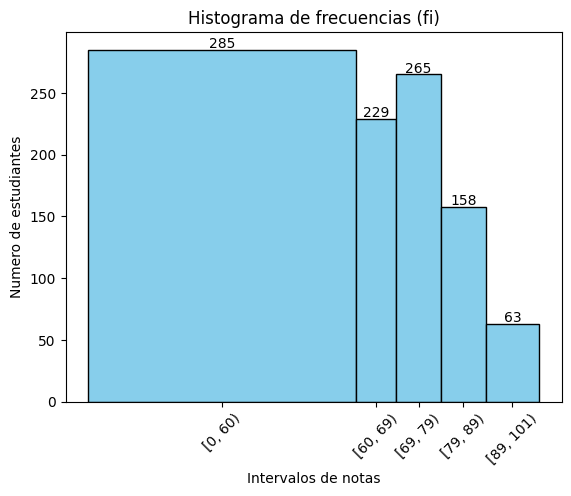

In [ ]:
# Histograma con matplotlib.

interval = frequency_table.index
xi = frequency_table["xi"].to_numpy()

plt.hist(note_finale,note_range ,edgecolor="black", color="skyblue")
plt.xticks(xi, [str(i) for i in interval],rotation=45)

for xi, f in zip(xi,fi):
    plt.text(xi,f+1.6, str(int(f)),ha="center",fontsize=10)

plt.title("Histograma de frecuencias (fi)")
plt.xlabel("Intervalos de notas")
plt.ylabel("Numero de estudiantes")
plt.show()

In [160]:

# Calculo de Varianza 

Analysis_Table = df["interval"].value_counts(sort=False).rename("f")
Analysis_Table = pd.DataFrame(Analysis_Table)

Analysis_Table["F"] = frequency_table["F"]
Analysis_Table["Xm"] = frequency_table["xi"]

Xm = Analysis_Table["Xm"].to_numpy()
N = np.sum(fi)
prom = np.sum(fi * Xm) / N

# Creacion de la tabla: 
Analysis_Table["f*Xm"] = fi * Xm
Analysis_Table["Xm - prom"] = Xm - prom 
Analysis_Table["(Xm - prom)^2"] =  Analysis_Table["Xm - prom"]**2
Analysis_Table["f(Xm - prom)^2"]  = Analysis_Table["(Xm - prom)^2"] * Analysis_Table["f"]

Analysis_Table

,f,F,Xm,f*Xm,Xm - prom,(Xm - prom)^2,f(Xm - prom)^2
interval,,,,,,,
"[0, 60)",285,285,30.0,8550.0,-32.1875,1036.035156,295270.019531
"[60, 69)",229,514,64.5,14770.5,2.3125,5.347656,1224.613281
"[69, 79)",265,779,74.0,19610.0,11.8125,139.535156,36976.816406
"[79, 89)",158,937,84.0,13272.0,21.8125,475.785156,75174.054688
"[89, 101)",63,1000,95.0,5985.0,32.8125,1076.660156,67829.589844


In [163]:
# Calculo de la varianza: 

varianza =  np.sum(Analysis_Table["f(Xm - prom)^2"]) / N
# Calculo de la desviacion tipica: 
desviacion_tipica = math.sqrt(varianza)
desviacion_tipica = round(desviacion_tipica,2)

# Coeficiente de Variacion: 
Cv = (desviacion_tipica / prom) * 100

# Medidas de dispersion: 

medidad_de_dispersion = {
    "S^2": [varianza],
    "S": [desviacion_tipica],
    "Cv": [Cv],
}

print(N)
print( np.sum(Analysis_Table["f(Xm - prom)^2"]))
print(prom)

df_medidad_de_dispersion = pd.DataFrame(medidad_de_dispersion, index=["Valores"])
df_medidad_de_dispersion.T

1000
476475.09375
62.1875


,Valores
S^2,476.475094
S,21.830000
Cv,35.103518


 Cuando hacemos los calculos en base a los intervalos se pierde inforrmacion de la distribucion.